In [2]:
import pandas as pd
from pandas.api.types import is_object_dtype, is_numeric_dtype
import numpy as np
import plotly.express as px
import statsmodels.api as sma
from sklearn import preprocessing 
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_csv("Other/diabetes_012_raw.csv")
data = pd.read_csv("Breast Cancer/data.csv")
#data = pd.read_csv("Other/Stroke Data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [8]:

nan_count = data.isnull().sum()

# For NumPy array
# nan_count = np.isnan(your_array).sum()

# Print the count of NaN values for each column
print("NaN Count per column:")
print(nan_count)

NaN Count per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [9]:
#Dzielimy dane na uczące i testowe 
X = data.drop(['id','diagnosis'], axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)

In [10]:
print(X.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Number of Malignant :  212
Number of Benign:  357


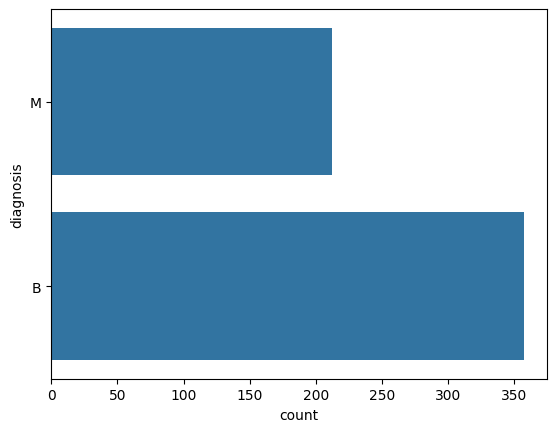

In [141]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Malignant : ',M)
print('Number of Benign: ',B)

In [11]:
# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)  # Dla problemu klasyfikacji
gbr = GradientBoostingRegressor(max_depth=5, random_state=42)   # Dla regresji 

# Now, you can train your model
gbc.fit(X_train, y_train)
preds_gbc = gbc.predict(X_test)

f1_score_all = round(f1_score(y_test, preds_gbc, average='weighted'), 3)
print(f1_score_all)

0.936


In [42]:
# KOPIA DANYCH DLA NOWEJ METODY
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [43]:
X_train_v1.var()

radius_mean                    12.501385
texture_mean                   17.758420
perimeter_mean                589.981216
area_mean                  128784.412347
smoothness_mean                 0.000190
compactness_mean                0.002622
concavity_mean                  0.006058
concave points_mean             0.001422
symmetry_mean                   0.000722
fractal_dimension_mean          0.000053
radius_se                       0.084363
texture_se                      0.269722
perimeter_se                    4.469452
area_se                      2389.610152
smoothness_se                   0.000010
compactness_se                  0.000324
concavity_se                    0.000903
concave points_se               0.000039
symmetry_se                     0.000064
fractal_dimension_se            0.000007
radius_worst                   23.037038
texture_worst                  36.211075
perimeter_worst              1094.498372
area_worst                 325760.018322
smoothness_worst

In [44]:
#CZASEM TRZEBA
scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

In [45]:
scaled_X_train_v1

array([[0.29624369, 0.27730808, 0.28381849, ..., 0.21839623, 0.15474078,
        0.12800949],
       [0.27812332, 0.22590463, 0.26940639, ..., 0.32576197, 0.09520993,
        0.18006104],
       [0.34276899, 0.14440311, 0.355879  , ..., 0.40203193, 0.24876799,
        0.31400475],
       ...,
       [0.32317939, 0.2404464 , 0.29937215, ..., 0.12093614, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.3052226 , ..., 0.66291727, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20605023, ..., 0.2696299 , 0.22255076,
        0.11648016]])

In [46]:
import plotly.express as px

# Assuming X is a DataFrame with column names
x = X.columns
y = scaled_X_train_v1.var(axis=0)

df = pd.DataFrame({'Feature': x, 'Variance': y})
df = df.sort_values(by="Variance", ascending=False)

fig = px.bar(df, x="Feature", y="Variance", color="Feature", title="Variance of Features")
fig.show()

In [47]:
# CZEŚĆ PIERWSZA #
# FILTER METHODS #

# Sposób Variance Threshold
var_threshold = VarianceThreshold(threshold=0.03)
var_threshold.fit(X_train_v1)

# Get the indices of non-constant columns
constant_columns_indices = [i for i, var in enumerate(var_threshold.get_support()) if not var]

# Get the names of constant columns
constant_columns = X_train_v1.columns[constant_columns_indices]

# Print or use the constant column names
print(constant_columns)


Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'smoothness_worst',
       'compactness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [48]:
X_train_v1 = X_train_v1.drop(columns = constant_columns)
X_test_v1 = X_test_v1.drop(columns = constant_columns)

In [49]:

gbc.fit(X_train_v1, y_train_v1)
preds_gbc = gbc.predict(X_test_v1)

f1_score_all = round(f1_score(y_test_v1, preds_gbc, average='weighted'), 3)
print(f1_score_all)

0.965


In [19]:
print(len(X_train_v1.columns))

13


In [20]:
# KOPIA DANYCH DLA NOWEJ METODY
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

<Axes: >

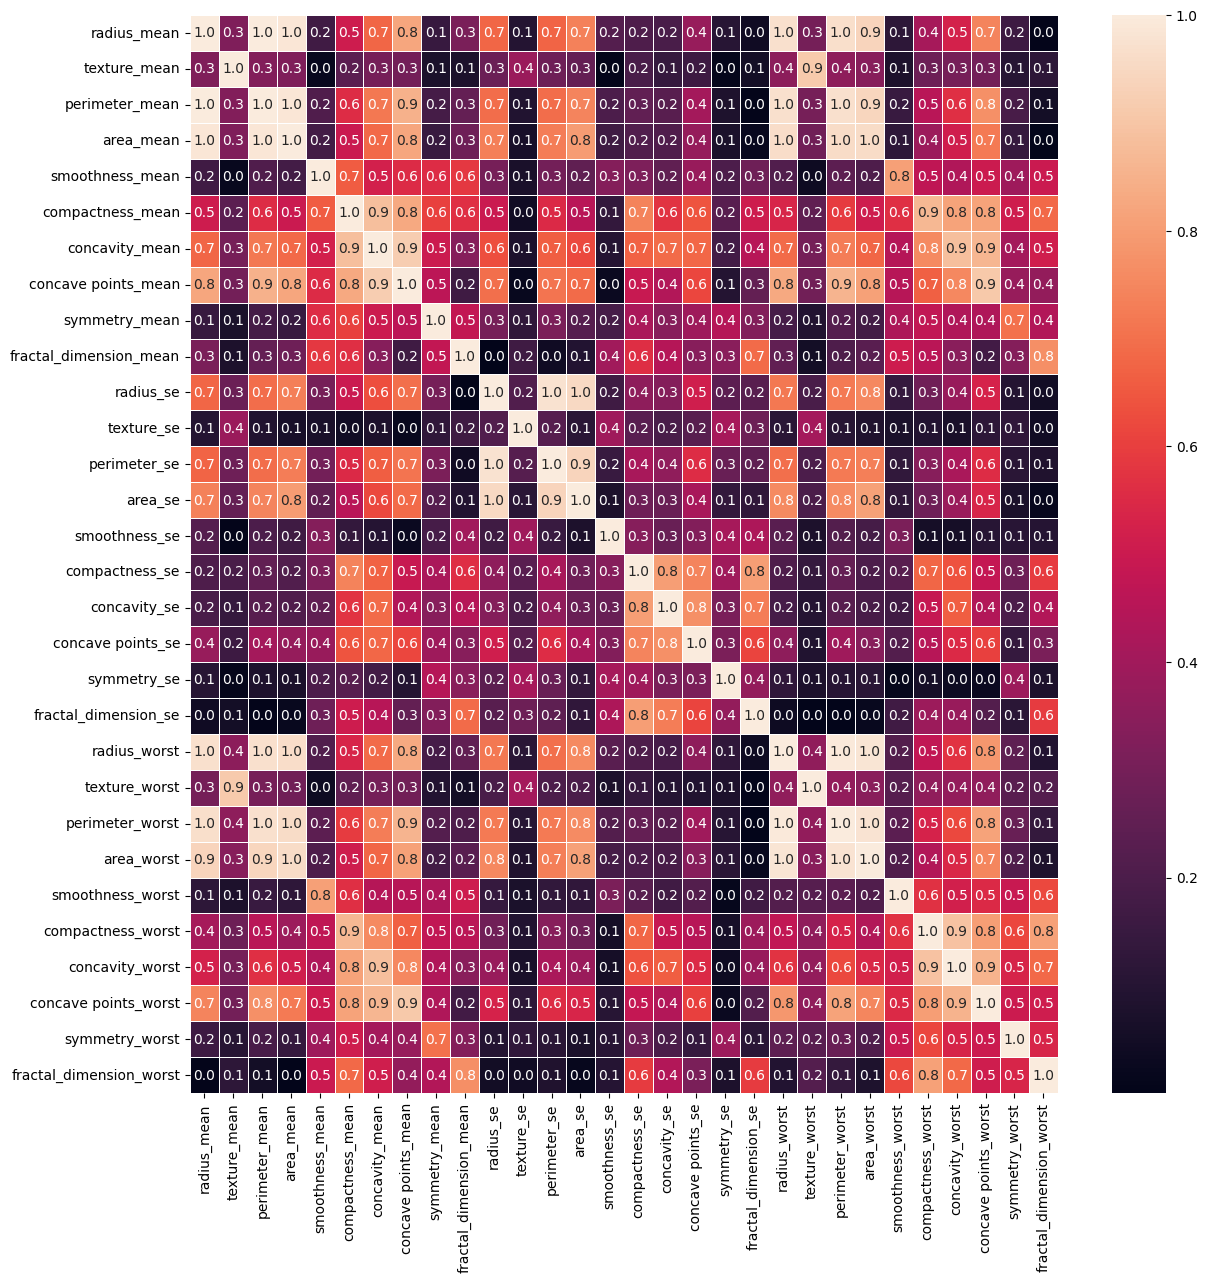

In [50]:
# Sposób Correlation-based

f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(abs(X.corr()), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [51]:
# Odrzucamy te parametry których współczynnik jest mniejszy od zadanego
def correlation(dataframe, threshold):
    highly_correlated = set()
    corr_thresh = threshold
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > corr_thresh:
                colname = corr_matrix.columns[i]
                highly_correlated.add(colname)

    return highly_correlated

In [52]:
correlated_features = correlation(X, 0.9)

In [24]:
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [53]:
X_train_v2 = X_train_v2.drop(columns=correlated_features)
X_test_v2 = X_test_v2.drop(columns=correlated_features)

KeyError: "['texture_worst', 'perimeter_se', 'radius_worst', 'concave points_worst', 'area_mean', 'perimeter_worst', 'area_se', 'perimeter_mean', 'area_worst', 'concave points_mean'] not found in axis"

In [ ]:
X_train_v2
X_test_v2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
204,12.470,18.60,0.09965,0.10580,0.08005,0.1925,0.06373,0.3961,1.0440,0.006953,0.019110,0.02701,0.010370,0.01782,0.003586,0.1426,0.23780,0.2671,0.3014,0.08750
70,18.940,21.31,0.09009,0.10290,0.10800,0.1582,0.05461,0.7888,0.7975,0.004444,0.016520,0.02269,0.013700,0.01386,0.001698,0.1193,0.23360,0.2687,0.2551,0.06589
131,15.460,19.48,0.10920,0.12230,0.14660,0.1931,0.05796,0.4743,0.7859,0.006240,0.014840,0.02813,0.010930,0.01397,0.002461,0.1546,0.23940,0.3791,0.2837,0.08019
431,12.400,17.68,0.10540,0.13160,0.07741,0.1811,0.07102,0.1767,1.4600,0.010000,0.032950,0.04861,0.011670,0.02187,0.006005,0.1450,0.26290,0.2403,0.2556,0.09359
540,11.540,14.44,0.09984,0.11200,0.06737,0.1818,0.06782,0.2784,1.7680,0.012150,0.041120,0.05553,0.014940,0.01840,0.005512,0.1345,0.21180,0.1797,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,0.09831,0.05234,0.03653,0.1590,0.05653,0.2368,0.8732,0.007962,0.005612,0.01585,0.008662,0.02254,0.001906,0.1296,0.07061,0.1039,0.2383,0.06410
542,14.740,25.42,0.08275,0.07214,0.04105,0.1840,0.05680,0.3031,1.3850,0.004775,0.011720,0.01947,0.012690,0.01870,0.002626,0.1060,0.13760,0.1611,0.2722,0.06956
176,9.904,18.06,0.09699,0.12940,0.13070,0.1669,0.08116,0.4311,2.2610,0.012860,0.088080,0.11970,0.024600,0.03880,0.017920,0.1301,0.29500,0.3486,0.2614,0.11620
501,13.820,24.49,0.11620,0.16810,0.13570,0.2275,0.07237,0.4751,1.5280,0.009680,0.038560,0.03476,0.016160,0.02434,0.006995,0.1794,0.39660,0.3381,0.3651,0.11830


In [ ]:
gbc.fit(X_train_v2, y_train_v2)
preds_gbc = gbc.predict(X_test_v2)

f1_score_all = round(f1_score(y_test_v2, preds_gbc, average='weighted'), 3)
print(f1_score_all)

0.936


In [28]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

<Axes: >

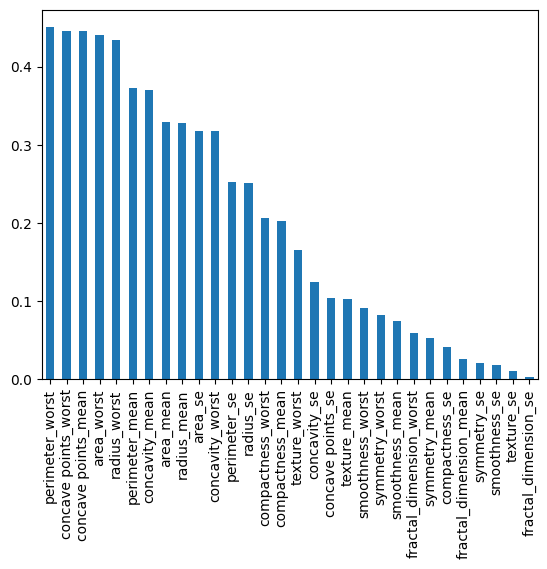

In [54]:
# Sposób z Mutual Information
mutual_info = mutual_info_classif(X_train_v3, y_train_v3)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_v3.columns
mutual_info.sort_values(ascending=False).plot.bar()

In [55]:
f1_score_list = []

for k in range (1 , len(X_train_v3.columns) + 1):
    selection = SelectKBest(mutual_info_classif, k=k)
    selection.fit(X_train_v3, y_train_v3)
    sel_X_train_v3 = selection.transform(X_train_v3)
    sel_X_test_v3 = selection.transform(X_test_v3)
    gbc.fit(sel_X_train_v3, y_train_v3)
    kbest_preds = gbc.predict(sel_X_test_v3)
    f1_score_kbest = round(f1_score(y_test_v3, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)

f1_score_list = pd.Series(f1_score_list)
f1_score_list

x = np.arange(1,30)
y = f1_score_list

# Create a DataFrame for visualization
df = pd.DataFrame({'Feature_Num': range(1, len(X_train_v3.columns) + 1), 'F1_Score': f1_score_list})
df['Feature_Num'] = df['Feature_Num'].astype(int)  # Convert to integers
df = df.sort_values(by="F1_Score", ascending=True)

# Plot the F1 scores
fig = px.bar(df, x="Feature_Num", y="F1_Score", color="Feature_Num", title="F1 Scores vs Feature Number")
fig.show()
    
    #X_train_v3 = X_train_v3.loc[:, selection.get_support()]
    #X_test_v3 = X_test_v3.loc[:, selection.get_support()]

In [31]:
X_train_v3
X_test_v3

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.2687,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.3791,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.13760,0.1611,0.10950,0.2722,0.06956
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830


In [32]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
# CZEŚĆ DRUGA #
# WRAPPER METHODS #


In [32]:
# Genetic Alghorithm
population_size = 300
features = 30

# STEP 1: Initialization operator
def initialize_population(population_size, num_features):
    population = np.random.randint(2, size=(population_size, num_features))
    return population

# STEP 2: Fitness Function
def fitness(features):
   feature_mask = features.astype(bool)
   X_train_subset = X_train_v4.loc[:, feature_mask]
   print(X_train_subset)
   X_test_subset = X_test_v4.loc[:, feature_mask]
   print(X_test_subset)
   gbc.fit(X_train_subset, y_train_v4)
   preds = gbc.predict(X_test_subset)
   f1_score_subset = round(f1_score(y_test_v4, preds, average='weighted'), 3)
   return f1_score_subset


initial_population = initialize_population(300,30)


     area_mean  compactness_mean  concavity_mean  concave points_mean  \
149      585.0           0.06376         0.02881              0.01329   
124      553.5           0.07325         0.08092              0.02800   
421      656.1           0.18360         0.14500              0.06300   
195      516.4           0.05366         0.03873              0.02377   
545      573.2           0.06747         0.02974              0.02443   
..         ...               ...             ...                  ...   
71       244.0           0.15310         0.08606              0.02872   
106      412.5           0.10170         0.07070              0.03485   
270      632.6           0.02675         0.00725              0.00625   
435      599.5           0.11330         0.11260              0.06463   
102      458.7           0.04038         0.02383              0.01770   

     radius_se  perimeter_se  area_se  smoothness_se  compactness_se  \
149     0.2500        1.5730    21.47       0.00283

In [93]:
initial_population[0]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
fitness_scores_list = [fitness(features) for features in initial_population]


In [33]:
fitness_scores_dict = {i + 1: score for i, score in enumerate(fitness_scores_list)}


In [34]:
fitness_scores_dict

{1: 0.925,
 2: 0.942,
 3: 0.924,
 4: 0.942,
 5: 0.959,
 6: 0.947,
 7: 0.93,
 8: 0.918,
 9: 0.965,
 10: 0.947,
 11: 0.953,
 12: 0.953,
 13: 0.953,
 14: 0.925,
 15: 0.942,
 16: 0.936,
 17: 0.947,
 18: 0.93,
 19: 0.959,
 20: 0.918,
 21: 0.936,
 22: 0.953,
 23: 0.953,
 24: 0.959,
 25: 0.93,
 26: 0.942,
 27: 0.953,
 28: 0.959,
 29: 0.959,
 30: 0.959,
 31: 0.947,
 32: 0.982,
 33: 0.947,
 34: 0.936,
 35: 0.936,
 36: 0.959,
 37: 0.953,
 38: 0.953,
 39: 0.953,
 40: 0.971,
 41: 0.936,
 42: 0.947,
 43: 0.953,
 44: 0.947,
 45: 0.965,
 46: 0.942,
 47: 0.982,
 48: 0.942,
 49: 0.959,
 50: 0.977,
 51: 0.959,
 52: 0.942,
 53: 0.942,
 54: 0.959,
 55: 0.977,
 56: 0.93,
 57: 0.953,
 58: 0.965,
 59: 0.93,
 60: 0.924,
 61: 0.971,
 62: 0.942,
 63: 0.965,
 64: 0.942,
 65: 0.947,
 66: 0.93,
 67: 0.936,
 68: 0.965,
 69: 0.971,
 70: 0.936,
 71: 0.936,
 72: 0.93,
 73: 0.936,
 74: 0.953,
 75: 0.947,
 76: 0.965,
 77: 0.942,
 78: 0.948,
 79: 0.947,
 80: 0.965,
 81: 0.942,
 82: 0.959,
 83: 0.942,
 84: 0.959,
 85: 0.9

In [35]:
print(len(fitness_scores_list))

300


In [36]:
# STEP 3: Selection
fitness_scores_sum = sum(fitness_scores_list)
fitness_scores_sum
individ = {}

def calc_individual_probabilities(individuals, fitness_scores_sum):
    for i in range(len(fitness_scores_list)):
        probability = fitness_scores_list[i]/fitness_scores_sum
        individuals[i] = probability
    return individuals

output_prob = calc_individual_probabilities(individuals=individ, fitness_scores_sum=fitness_scores_sum)

In [37]:
output_prob

{0: 0.0032456595882047424,
 1: 0.0033053095482041806,
 2: 0.003242150767028305,
 3: 0.0033053095482041806,
 4: 0.003364959508203619,
 5: 0.0033228536540863686,
 6: 0.0032632036940869304,
 7: 0.0032210978399696798,
 8: 0.0033860124352622445,
 9: 0.0033228536540863686,
 10: 0.003343906581144994,
 11: 0.003343906581144994,
 12: 0.003343906581144994,
 13: 0.0032456595882047424,
 14: 0.0033053095482041806,
 15: 0.0032842566211455557,
 16: 0.0033228536540863686,
 17: 0.0032632036940869304,
 18: 0.003364959508203619,
 19: 0.0032210978399696798,
 20: 0.0032842566211455557,
 21: 0.003343906581144994,
 22: 0.003343906581144994,
 23: 0.003364959508203619,
 24: 0.0032632036940869304,
 25: 0.0033053095482041806,
 26: 0.003343906581144994,
 27: 0.003364959508203619,
 28: 0.003364959508203619,
 29: 0.003364959508203619,
 30: 0.0033228536540863686,
 31: 0.003445662395261683,
 32: 0.0033228536540863686,
 33: 0.0032842566211455557,
 34: 0.0032842566211455557,
 35: 0.003364959508203619,
 36: 0.0033439065

In [38]:
def selection(population_size, output_prob)
    half_population_size = int(population_size/2)
    # Get the keys (indices) of fitness_scores_list
    indices = list(output_prob.keys())
    # Use np.random.choice to select indices based on the probabilities
    selected_indices = np.random.choice(indices, size=half_population_size, p=list(output_prob.values()))
    selected_population = initial_population[selected_indices]
    return selected_population


In [39]:
selected_indices

array([227,   9,  14, 199, 165,  55, 273,  33,  14,  65, 299, 161, 255,
        36, 209, 296, 152, 136, 151, 147, 245, 243, 268, 154,   2, 165,
       230, 100, 295,  92, 126,  21,  72,  97, 127, 140, 210, 252, 277,
       103,  70, 220, 104, 167, 167, 237, 269, 245, 118,  87, 139,  41,
       241, 156, 152, 146, 130, 235, 268, 265, 126, 224, 261, 212, 123,
       142, 180, 168,  17, 100,  77, 254, 273, 126,  74, 116, 142, 264,
       232, 197, 287,  94, 200,  82,   8, 153, 235,  18,  92,  29, 290,
       288, 183, 298, 226, 139,  86, 241, 232, 232,  91,  68, 291, 277,
       184, 227,  28,  46, 100, 203,  92,  14,  14, 165,   3, 226, 283,
       299, 248, 171, 198,  35, 216, 235, 281, 260,  29, 156, 168,   6,
       216,  33,  98, 273, 163, 210,  50,  47, 122, 124, 299,  77, 240,
        87, 249,  86, 224, 167,  55, 153])

In [40]:
initial_population

array([[0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [41]:
selected_population = initial_population[selected_indices]

In [47]:
print(selected_population.shape)

(150, 30)


Selected random parent:
[[1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0]
 [0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0]]


In [95]:
# STEP 4: CROSSOVER
next_gen = []
for i in range (125):
    random_row_indices = np.random.choice(selected_population.shape[0], size=2, replace=False)
    random_parents = selected_population[random_row_indices, :]
    print("Random Parents \n", random_parents)
    offspring = np.zeros((4, random_parents.shape[1]))

    for j in range(random_parents.shape[1]):
        offspring[:, j] = np.random.choice(random_parents[:, j], size=4)

    for k in range(offspring.shape[0]):
        next_gen.append(offspring[k])


Random Parents 
 [[0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1]
 [0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0]]
Random Parents 
 [[1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0]
 [0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]]
Random Parents 
 [[0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0]
 [1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0]]
Random Parents 
 [[0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0]
 [0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1]]
Random Parents 
 [[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1]
 [0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0]]
Random Parents 
 [[0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0]
 [1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1]]
Random Parents 
 [[1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0]
 [1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 

In [98]:
next_gen = np.array(next_gen, dtype=int)

In [99]:
#Step 5: Mutation
for i in range(next_gen.shape[0]):
   random_gene_from_individual = np.random.choice(selected_population.shape[1], size=1)
   print(random_gene_from_individual)
   if next_gen[i][random_gene_from_individual] == 1:
      next_gen[i][random_gene_from_individual] = 0
   else:
      next_gen[i][random_gene_from_individual] = 1

[23]
[6]
[6]
[20]
[19]
[0]
[1]
[20]
[6]
[8]
[14]
[2]
[5]
[19]
[19]
[7]
[16]
[17]
[20]
[22]
[28]
[1]
[18]
[20]
[0]
[26]
[17]
[18]
[23]
[27]
[18]
[11]
[18]
[26]
[15]
[23]
[24]
[19]
[20]
[0]
[8]
[14]
[21]
[14]
[29]
[27]
[26]
[19]
[13]
[14]
[11]
[11]
[25]
[27]
[18]
[22]
[20]
[9]
[24]
[21]
[17]
[15]
[9]
[21]
[23]
[12]
[24]
[11]
[27]
[1]
[2]
[24]
[1]
[11]
[24]
[29]
[24]
[18]
[6]
[9]
[4]
[29]
[10]
[5]
[27]
[23]
[29]
[19]
[1]
[0]
[4]
[16]
[17]
[10]
[4]
[15]
[10]
[16]
[3]
[5]
[1]
[11]
[28]
[21]
[9]
[16]
[17]
[10]
[15]
[2]
[8]
[10]
[0]
[8]
[4]
[24]
[2]
[13]
[18]
[28]
[17]
[0]
[7]
[14]
[18]
[3]
[2]
[25]
[13]
[16]
[22]
[17]
[19]
[4]
[27]
[20]
[21]
[23]
[21]
[25]
[16]
[14]
[22]
[21]
[10]
[20]
[11]
[24]
[25]
[12]
[10]
[25]
[21]
[1]
[18]
[19]
[4]
[6]
[22]
[12]
[7]
[28]
[0]
[15]
[20]
[12]
[15]
[15]
[25]
[7]
[5]
[10]
[10]
[1]
[6]
[5]
[6]
[11]
[16]
[3]
[19]
[8]
[28]
[20]
[28]
[28]
[25]
[9]
[24]
[28]
[20]
[6]
[13]
[22]
[15]
[0]
[10]
[25]
[26]
[11]
[27]
[9]
[24]
[15]
[21]
[29]
[24]
[28]
[17]
[24]
[9]
[27]

In [100]:
next_gen[0]

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
#GOTOWY GENETYCZNY
import pandas as pd
import numpy as np
import sklearn as skn
from tqdm import tqdm
import plotly.express as px
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Breast Cancer/data.csv")
# data = pd.read_csv("Other/diabetes_012_raw.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

#Dzielimy dane na uczące i testowe 
X = data.drop(['id','diagnosis'], axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)  # Dla problemu klasyfikacji

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

# Genetic Alghorithm
population_size = 300
features = 30
num_of_generations = 10
best_individual = None
best_fitness_score = 0

# STEP 1: Initialization operator
def initialize_population(population_size, num_features):
    population = np.random.randint(2, size=(population_size, num_features))
    print("Population generated!\n")
    return population

# STEP 2: Fitness Function
def fitness(features):
   feature_mask = features.astype(bool)
   X_train_subset = X_train_v4.loc[:, feature_mask]
   X_test_subset = X_test_v4.loc[:, feature_mask]
   gbc.fit(X_train_subset, y_train_v4)
   preds = gbc.predict(X_test_subset)
   f1_score_subset = round(f1_score(y_test_v4, preds, average='weighted'), 3)
# Update best individual if current individual is better
   global best_individual, best_fitness_score
   if f1_score_subset > best_fitness_score:
       best_fitness_score = f1_score_subset
       best_individual = features.copy()
   return f1_score_subset

# STEP 3: Selection
def calc_individual_probabilities(individuals, fitness_scores_sum):
    for i in range(len(fitness_scores_list)):
        probability = fitness_scores_list[i]/fitness_scores_sum
        individuals[i] = probability
    return individuals

def selection(population, population_size, output_prob):
    half_population_size = int(population_size/2)
    indices = list(output_prob.keys())
    selected_indices = np.random.choice(indices, size=half_population_size, p=list(output_prob.values()))
    selected_population = population[selected_indices]
    return selected_population

def uniform_crossover(selected_population):
    next_gen = []
    for _ in tqdm(range(150), desc='Crossover progress', colour = "green", leave=True):
        random_row_indices = np.random.choice(selected_population.shape[0], size=2, replace=False)
        random_parents = selected_population[random_row_indices, :]
        offspring = np.zeros((2, random_parents.shape[1]))

        for j in range(random_parents.shape[1]):
            offspring[:, j] = np.random.choice(random_parents[:, j], size=2)

        for k in range(offspring.shape[0]):
            next_gen.append(offspring[k])

    next_gen = np.array(next_gen, dtype=int)
    # print("NEXT GENERATION:\n", next_gen, "SIZE: ", len(next_gen))
    return next_gen

#Step 5: Mutation
def mutation(next_gen):
    for i in range(next_gen.shape[0]):
       random_gene_from_individual = np.random.choice(selected_population.shape[1], size=1)
       if next_gen[i][random_gene_from_individual] == 1:
          next_gen[i][random_gene_from_individual] = 0
       else:
          next_gen[i][random_gene_from_individual] = 1
    # print("NEXT_GENERATION MUTATED:\n", next_gen)
    return next_gen

population = initialize_population(population_size=population_size, num_features=features)

for i in range (num_of_generations):
    print("Fitness calculation !")
    fitness_scores_list = [fitness(features) for features in tqdm(population, desc='Fitness Score Calculation Progress', colour = "green", leave=True)]
    print("\nNajlepszy wynik dla generacji nr :", i+1 , "to :", max(fitness_scores_list))
    fitness_scores_sum = sum(fitness_scores_list)
    individ = {}
    output_prob = calc_individual_probabilities(individuals=individ, fitness_scores_sum=fitness_scores_sum)
    selected_population = selection(population , population_size=300, output_prob=output_prob)
    next_gen = uniform_crossover(selected_population=selected_population)
    next_gen_mutated = mutation(next_gen=next_gen)
    population = next_gen_mutated

print("Best individual:", best_individual)
print("Best fitness score:", best_fitness_score)

mask = best_individual.astype(bool)
final = X_train_v4.loc[:, mask]
print(final.columns)

In [ ]:
next_gen[0]

In [75]:
next_gen = np.array(next_gen)

In [77]:
next_gen.shape

(500, 30)

In [ ]:
# TERAZ MUSZE WYBRAC DWOCH OSOBNIKOW, I Z NIMI CROSSOVER I TO NOWY/NOWE OSOBNIK 151... i tak dalej


# POTEM DODAJE MUTACJE DO NOWEGO OSOBNIKA/OSOBNIKOW czyli losowo zamieniam dany BIT

# ZNOWU SPRAWDZAM WYNIKI

# ZNOWU WYBIERAM POLOWE 

#ETC......

# AZ NIE WYKONCZY SIE OKRESLONA ILOSC GENERACJI LUB INNE WARUNKI


In [ ]:

gbc.fit(X_train, y_train)
preds_gbc = gbc.predict(X_test)

f1_score_all = round(f1_score(y_test, preds_gbc, average='weighted'), 3)
print(f1_score_all)


In [54]:
# Forward Selection
# Opis działania: Zaczynamy bez żadnych features, wybieramy jeden najlepszy, zapisujemy, kolejny cykl taki samy tylko dodajemy do najlepszego zestawu
best_features = set()
scores = []
features_mask = np.zeros(X_train.shape[1], dtype=bool)
best_score = 0
f1_score_best = 0

while np.sum(features_mask) < 30:
    for i in range(X_train.shape[1]):
        if not features_mask[i]:
            features_mask[i] = True
            X_train_subset = X_train.loc[:, features_mask]
            X_test_subset = X_test.loc[:, features_mask]
            gbc.fit(X_train_subset, y_train)
            preds = gbc.predict(X_test_subset)
            f1_score_subset = round(f1_score(y_test, preds, average='weighted'), 3)
            scores.append(f1_score_subset)
            features_mask[i] = False
        else:
            scores.append(0)
    print(scores)
    best_index = np.argmax(scores)
    best_score = max(scores)
    if best_score >= f1_score_best:
        print("Best index", best_index)
        best_features.add(X_train.columns[best_index])
        features_mask[best_index] = True
        print("\nNew Features Mask: \n", features_mask)
        X_train_best = X_train.loc[:, features_mask]
        X_test_best = X_test.loc[:, features_mask]
        gbc.fit(X_train_best, y_train)
        preds = gbc.predict(X_test_best)
        f1_score_best = round(f1_score(y_test, preds, average='weighted'), 3)
        print(f1_score_best)
        print("\nbest_features", best_features, "\n")
        scores.clear()
    else:
        print("\nNo improvment between previous score !\n")
        print("\nbest_features", best_features, "\n")
        break


[0.835, 0.647, 0.848, 0.816, 0.623, 0.741, 0.83, 0.871, 0.584, 0.559, 0.781, 0.517, 0.789, 0.849, 0.569, 0.587, 0.638, 0.678, 0.515, 0.608, 0.859, 0.611, 0.872, 0.901, 0.67, 0.762, 0.82, 0.906, 0.585, 0.62]
Best index 27

New Features Mask: 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False]
0.906

best_features {'concave points_worst'} 

[0.93, 0.882, 0.936, 0.93, 0.9, 0.894, 0.906, 0.894, 0.895, 0.918, 0.907, 0.895, 0.912, 0.93, 0.889, 0.918, 0.9, 0.913, 0.901, 0.901, 0.942, 0.889, 0.936, 0.942, 0.901, 0.906, 0.924, 0, 0.9, 0.936]
Best index 20

New Features Mask: 
 [False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False  True False False]
0.942

best_features {'concave points_worst', 'radius_worst'} 

[0.942, 0.953, 0.942, 0.947, 0.947, 0.947, 

In [124]:
sfs = SequentialFeatureSelector(RandomForestClassifier(),
          direction="forward",)

sfs.fit(X, y)
list = sfs.get_feature_names_out()

list

        
    
    




array(['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'texture_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'smoothness_worst',
       'symmetry_worst'], dtype=object)

In [ ]:
# Backward Elimination
best_features = []
scores = []
features_mask = np.ones(X_train.shape[1], dtype=bool)
original_indices = list(range(X_train.shape[1]))
X_train_subset = X_train.loc[:, features_mask]
X_test_subset = X_test.loc[:, features_mask]
gbc.fit(X_train_subset, y_train)
preds = gbc.predict(X_test_subset)
f1_score_features = round(f1_score(y_test, preds, average='weighted'), 3)
print(f1_score_features)
best_features.extend(X_train.columns)
initial_len = len(best_features)
print(best_features)

while np.sum(features_mask) > 0:
    for i in range(X_train.shape[1]):
        if features_mask[i]:
            features_mask[i] = False
            print(features_mask)
            X_train_subset = X_train.loc[:, features_mask]
            X_test_subset = X_test.loc[:, features_mask]
            gbc.fit(X_train_subset, y_train)
            preds = gbc.predict(X_test_subset)
            f1_score_subset = round(f1_score(y_test, preds, average='weighted'), 3)
            scores.append((f1_score_subset, original_indices[i]))
            features_mask[i] = True
    print(scores)
    print(len(scores))
    worst_index = np.argmin([score[0] for score in scores])
    best_index = np.argmax([score[0] for score in scores])
    print("Worst index:", worst_index)
    print("Best index:", best_index)
    best_score = scores[best_index][0]
    if best_score >= f1_score_features:
        features_mask[scores[best_index][1]] = False
        print("\nNew Features Mask:\n", features_mask)
        print("Worst Feature Index:", worst_index)
        worst_feature = best_features[worst_index]
        print("Worst Feature:", worst_feature)
        best_features.remove(worst_feature)
        print("New Best Features:", best_features)
        X_train_best = X_train.loc[:, features_mask]
        X_test_best = X_test.loc[:, features_mask]
        gbc.fit(X_train_best, y_train)
        preds = gbc.predict(X_test_best)
        f1_score_best = round(f1_score(y_test, preds, average='weighted'), 3)
        f1_score_features = f1_score_best
        print("F1 Score with Best Features:", f1_score_best)
        scores.clear()
    else:
        print("\nNo improvement between previous score!\n")
        print("\nBest Features:", best_features, "\n")
        break


In [ ]:
from tqdm import tqdm
# Ant colony optimization for feature selection

data = pd.read_csv("Breast Cancer/data.csv")
# data = pd.read_csv("Other/diabetes_012_raw.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

#Dzielimy dane na uczące i testowe 
X = data.drop(['id','diagnosis'], axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=42)

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)  # Dla problemu klasyfikacji

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

# Krok 1 Wygeneruj populacje mrówek
def generate_ant_population(ants_colony_size, num_features):
    ants = np.zeros(shape=(ants_colony_size, num_features), dtype=int)
    for ant in ants:
        random_bit_index = np.random.randint(0, num_features)
        ant[random_bit_index] = 1
    print("Ants generated!\n")
    return ants

# Krok 2 Inicjalizacja macierzy feromonów rozmiary X na X gdzie X to liczba cech (kazda wartość taka sama)                                                                                                                                         
def generate_pheromone_matrix(num_features, base_value):
    pheromone_matrix = np.full((num_features, num_features), base_value, dtype=float)   
    return pheromone_matrix

def update_pheromone_matrix():
    pass

def ants_select_feature(ants, pheromone_matrix):
    num_ants, num_features = ants.shape
    for ant_index in range(num_ants):
        for feature_index in range(1):
            probability = pheromone_matrix[feature_index] / np.sum(pheromone_matrix[feature_index])
            print(probability)
            selected_feature_index = np.random.choice(range(num_features), size=1, p=probability)
            ants[ant_index, selected_feature_index] = 1
    return ants

def fitness(features):
   feature_mask = features.astype(bool)
   X_train_subset = X_train_v4.loc[:, feature_mask]
   X_test_subset = X_test_v4.loc[:, feature_mask]
   gbc.fit(X_train_subset, y_train_v4)
   preds = gbc.predict(X_test_subset)
   f1_score_subset = round(f1_score(y_test_v4, preds, average='weighted'), 3)
# Update best individual if current individual is better
#    global best_individual, best_fitness_score
#    if f1_score_subset > best_fitness_score:
#        best_fitness_score = f1_score_subset
#        best_individual = features.copy()
   return f1_score_subset


ants = generate_ant_population(5, 30)
pheromone_matrix = generate_pheromone_matrix(30, 0.2)
#probability_matrix = generate_probability_matrix(5)

print("Ants: \n", ants)
print("Pheromone matrix :\n", pheromone_matrix)
ants_selected = ants_select_feature(ants, pheromone_matrix)
print(ants_selected)
#print("Probability matrix :\n", probability_matrix)
fitness_scores_ants = [fitness(features) for features in tqdm(ants_selected, desc='Fitness Score Calculation Progress', colour = "green", leave=True)]
print(fitness_scores_ants)




# Krok 3 Zdefiniuj funkcje celu (może to być np F1_SCORE lub inny parametr dokładności)

# Krok 4 Uruchamiamy algorytm

evaporation_rate = 0.1 # feromony zanikaja o 10% z każdą iteracją // UWAGA TRZEBA PRZEMYSLEC, BO MOZE BYC DYNAMICZNYTEZ

# Krok 5 Każda mrówka dokonuje wyboru pojedyńczego parametru, dokonujemy kalkulacji wyniku każdej mrówki

# def ants_move(ants, pheromone_matrix, probability_matrix):
#     for ant_index in ants:
#         # Calculate the probability of selecting each feature for the current ant
#         probabilities = pheromone_matrix[ant_index] * probability_matrix[ant_index]
#         print("Probabilities: \n", probabilities)
#         # Normalize probabilities to make them sum to 1
#         probabilities /= probabilities.sum()
#         print("Normalized probabilities: \n", probabilities)
#         # Select a feature index based on the calculated probabilities
#         print(probabilities[ant_index][0])
#         selected_index = np.random.choice(len(probabilities), 1, p=probabilities[ant_index][0])
#         print(selected_index)

# first_move = ants_move(ants, pheromone_matrix, probability_matrix)
# print("First moves", first_move)
        

# Wiekszy wynik F1_SCORE/Dokladność modelu, skutkuje większa wartościa dla aktualizacji feromonu w macierzy, analogiczne słabszy wynik to mniejsza ilość feromonów

# Krok 6 Kiedy każda mrówka dokona wyboru, aktualizujemy macierz fermonów bazując na ich wynikach

# Krok 7 Powtarzamy proces do osiągniecia funkcji celu

# Notka!!!!
# Warto przygotowac takie parametry jak:
# Ilość mrówek

# EVAPORATION RATE
# Definition: The rate at which pheromone values decay over time.
# Selection: A higher evaporation rate promotes exploration, while a lower rate emphasizes exploitation.
# Pheromone Intensity (Deposit Rate):

# PHEROMONES INTENSITY (Deposit Rate):
# Definition: The amount of pheromone deposited on a trail by an ant when constructing a solution.
# Selection: A higher deposit rate intensifies pheromone trails, influencing other ants to follow the same path.

# Alpha and Beta Parameters:
# Definition: Parameters that balance the influence of pheromones and heuristic information in the solution construction process.
# Selection: Higher alpha values give more weight to pheromones, emphasizing exploitation. Higher beta values give more weight to heuristic information, emphasizing exploration.



# KAZDY NODE POŁĄCZONY JEST Z KAZDYM

# JEZELI NODE JEST ODWIEDZANY TO USTAWIANY JEST NA 1 (Aktualizujemy wtedy wszystkie sąsiadujące nody czyli te co maja 1)
# JEZELI WYRZUCA Z TRASY USTAWIA GO NA 0 ()

In [ ]:
# # Krok X Zdefiniuj macierz z prawdopodobienstwami odwiedzenia danego node
# def generate_probability_matrix(num_features):
#     probability_matrix = np.full((num_features, num_features), 1/(num_features-1), dtype=float)
#     np.fill_diagonal(probability_matrix, 0.0)
#     probability_matrix /= probability_matrix.sum(axis=1, keepdims=True)
#     return probability_matrix

In [ ]:
#  Recursive Feature Elimination (RFE):


In [ ]:
# I moooooże Boruta Algorithm:

In [ ]:
# CZEŚĆ TRZECIA #
# EMBEDDED METHODS
# Decision Tree-based Methods (Random Forest, Gradient Boosting):


In [ ]:
#XGBoost, LightGBM, and CatBoost: